In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [2]:
feature_data = pd.read_csv('features.txt', header=None, sep="  ", names=['feature_names', 'feature_description'])
feature_data

C:\Users\x-her\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,feature_names,feature_description
0,nb_words_title,Number of words in the article's titles
1,nb_words_content,Number of words in the article
2,pp_uniq_words,Proportion of unique words in the article
3,pp_stop_words,Proportion of stop words (i.e. words predefine...
4,pp_uniq_non-stop_words,Proportion of non-stop words among unique words
5,nb_links,Number of hyperlinks in the article
6,nb_outside_links,Number of hyperlinks pointing to another website
7,nb_images,Number of images in the article
8,nb_videos,Number of videos in the article
9,ave_word_length,Average word length


In [3]:
feature_names = list(feature_data['feature_names'])
data = pd.read_csv('train.csv', header=None, sep=" ", names=feature_names)
data.head()

,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,ave_word_length,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,9,843,0.5358,2.092000e-09,0.7469,15.0,8,11,1,4,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.05,0.0,0.0
2001,9,805,0.4196,2.165000e-09,0.5693,8.0,7,1,0,4,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.10,0.9,0.3
2002,8,145,0.7594,1.163000e-08,0.8488,7.0,3,0,2,4,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.20,0.0,0.0
2003,12,201,0.6359,9.259000e-09,0.8148,7.0,2,0,0,4,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.40,0.0,0.0
2004,13,673,0.4609,2.500000e-09,0.5950,8.0,7,1,0,4,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.10,0.0,0.0


### Encoding categorical features

In [4]:
weekday_data = pd.get_dummies(data['weekday'], prefix='weekday', drop_first=True)
category_data = pd.get_dummies(data['category'], prefix='category', drop_first=True)

other_data = data.drop(['weekday', 'category'], axis=1)

data = pd.concat([weekday_data, category_data, other_data], axis=1)

data.head()

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,category_1,category_2,category_3,category_4,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,1,0,0,0,0,0,1,0,0,0,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.05,0.0,0.0
2001,0,1,0,0,0,0,0,0,0,0,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.10,0.9,0.3
2002,0,0,0,0,0,0,0,0,0,1,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.20,0.0,0.0
2003,0,1,0,0,0,0,0,0,0,1,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.40,0.0,0.0
2004,0,1,0,0,0,0,0,0,0,0,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.10,0.0,0.0


### Data

In [5]:
X = data.values

pred = pd.read_csv('train-targets.csv', sep=',')
Y = pred.drop(['Id'], axis=1).values[:,0]

In [6]:
print(X)
print(Y)

[[ 1.      0.      0.     ..., -0.05    0.      0.    ]
 [ 0.      1.      0.     ..., -0.1     0.9     0.3   ]
 [ 0.      0.      0.     ..., -0.2     0.      0.    ]
 ..., 
 [ 0.      0.      0.     ..., -0.25    0.6429  0.2143]
 [ 0.      0.      0.     ...,  0.      0.85    0.2   ]
 [ 0.      0.      0.     ..., -0.1     1.     -1.    ]]
[ 882 1102 1102 ..., 1401  902 1204]


In [7]:
print(X.shape)
print(Y.shape)

(5000, 52)
(5000,)


### Outliers elimination

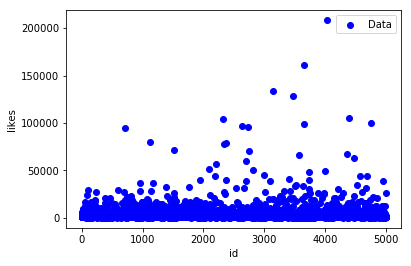

In [8]:
set_matplotlib_formats('png')

Id = [i for i in range(5000)]
plt.scatter(Id, Y, label='Data', color='blue')
plt.xlabel('id') ; plt.ylabel('likes')
plt.legend()

In [9]:
def outliers_elimination(X, y, threshold):
    outliers_indices = np.where(y >= threshold)
    outliers = y[outliers_indices]
    
    X = np.delete(X, outliers_indices, axis=0)
    y = np.delete(y, outliers_indices, axis=0)
    
    return X, y

### Training set and validation data

In [10]:
list_indices = np.arange(len(Y))
np.random.shuffle(list_indices)

train_loc = list_indices[:4000]
test_loc = list_indices[4000:]

In [11]:
# validation set
Xvad = X[test_loc]
yvad = Y[test_loc]

# Training set
Xt = X[train_loc]
Yt = Y[train_loc]

In [12]:
print(Xt)
print(Yt)

print(Xt.shape)
print(Xvad.shape)

[[ 1.      0.      0.     ..., -0.1     0.      0.    ]
 [ 1.      0.      0.     ..., -0.1     0.1     0.3   ]
 [ 0.      0.      0.     ..., -0.05    0.      0.    ]
 ..., 
 [ 0.      0.      0.     ..., -0.15    0.3     0.2   ]
 [ 1.      0.      0.     ..., -0.3     0.3333  0.25  ]
 [ 1.      0.      0.     ..., -0.1     0.      0.    ]]
[  525  2001   570 ...,  1301   828 11603]
(4000, 52)
(1000, 52)


In [13]:
(Xt, Yt) = outliers_elimination(Xt, Yt, 70000)

In [14]:
print(Xt.shape)
print(Yt.shape)

(3985, 52)
(3985,)


### Scaling data

In [15]:
from sklearn import preprocessing

# Create scaler object
sc = preprocessing.StandardScaler()
        
# Fit the scaler and transform training data
Xt = sc.fit_transform(Xt)
        
# Transform test data
Xvad = sc.transform(Xvad)

### Folds

In [16]:
from sklearn import model_selection
skf = model_selection.KFold(n_splits=10)
folds = [(tr,te) for (tr,te) in skf.split(Xt, Yt)]

### Features selection

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
def cross_validate_features(design_matrix, labels, regressor, cv_folds):

    for tr, te in cv_folds:
        # Restrict data to train/test folds
        Xtr = design_matrix[tr, :]
        ytr = labels[tr]
        Xte = design_matrix[te, :]
        yte = labels[te]
        
        # Fit classifier
        regressor.fit(Xtr, ytr)
        
    return regressor

In [ ]:
rgs_fex = ExtraTreesRegressor()
rgs_fex = cross_validate_features(Xt, Yt, rgs_fex, folds)

model = SelectFromModel(rgs_fex, prefit=True)
Xt_new = model.transform(Xt)
Xvad_new = model.transform(Xvad)

In [ ]:
print(rgs_fex.feature_importances_)
print(Xt_new.shape)

Without cross-validation

In [26]:
rgs_fex_ = ExtraTreesRegressor()
rgs_fex_.fit(Xt, Yt)

print(rgs_fex_.feature_importances_)

model = SelectFromModel(rgs_fex_, prefit=True)
Xt_new_ = model.transform(Xt)
Xvad_new_ = model.transform(Xvad)

print(Xt_new_.shape)

[ 0.02073372  0.01746623  0.01111176  0.00942349  0.00966695  0.00790662
  0.00357863  0.00935339  0.00176271  0.00514036  0.00966813  0.02457188
  0.022       0.03189184  0.00075964  0.03438418  0.01868821  0.02206383
  0.02424932  0.04450652  0.00899758  0.01553103  0.01312642  0.01688796
  0.02152924  0.02081959  0.00688424  0.0164938   0.01575111  0.02240195
  0.0376493   0.03686342  0.02561711  0.03140348  0.01688519  0.0162282
  0.01405094  0.02882803  0.01902973  0.02728304  0.02948643  0.01615728
  0.02048812  0.02249362  0.01818991  0.01748693  0.01303845  0.02560059
  0.01736095  0.03215763  0.01924239  0.02710894]
(3985, 24)


### Cross validation

In [17]:
def cross_validate(design_matrix, labels, regressor, cv_folds):

    pred = np.zeros(labels.shape)
    
    for tr, te in cv_folds:
        # Restrict data to train/test folds
        Xtr = design_matrix[tr, :]
        ytr = labels[tr]
        Xte = design_matrix[te, :]
        yte = labels[te]
        
        # Fit classifier
        regressor.fit(Xtr, ytr)

        # Compute prediction
        ypred = regressor.predict(Xte)
        
        # Update pred
        pred[te] = ypred
        
    return pred

In [40]:
def cross_validate_scoring(design_matrix, labels, regressor, cv_folds):

    pred = np.zeros(labels.shape)
    pred_score = []
    
    for tr, te in cv_folds:
        # Restrict data to train/test folds
        Xtr = design_matrix[tr, :]
        ytr = labels[tr]
        Xte = design_matrix[te, :]
        yte = labels[te]
        
        # Fit classifier
        regressor.fit(Xtr, ytr)

        # Compute prediction
        ypred = regressor.predict(Xte)
        
        # Update pred
        pred[te] = ypred
        
        pred_score.append(score(yte, ypred))
        
    return pred, pred_score

# SVM with default C and epsilon

In [27]:
from sklearn import svm

rgs_lSVR = svm.SVR(kernel='linear', C=1, epsilon=0.1)
ypred_lSVR = cross_validate(Xt_new_, Yt, rgs_lSVR, folds)

### Prediction

In [19]:
from sklearn import metrics

def score(X, y):
    return np.sqrt(metrics.mean_squared_log_error(X,y))

In [28]:
yvad_pred_lSVR = rgs_lSVR.predict(Xvad_new_)
print(score(yvad, yvad_pred_lSVR))

# C=1, epsilon=0.1 | K10 | 0.911175507227
# C=20, epsilon=14 | K10 | 0.906233012944

# C=1, epsilon=0.1 | fex | K10 | 0.919100807276
# C=20, epsilon=14 | fex | K10 | 0.912570415476

# C=20, epsilon=14 | fex | K5 | 0.918690493542

# C=20, epsilon=14 | cv_fex | K10 | 0.912570415476

# C=1, epsilon=0.1 | K10 | shuf | 0.923513926151

# C=1, epsilon=0.1 | fex | K10 | shuf | 0.913570609851

0.872670942128


In [21]:
score(Yt, ypred_lSVR)

# C=1, epsilon=0.1 | K10 | 0.88753558078152539
# C=20, epsilon=14 | K10 | 0.88117686257177841

# C=1, epsilon=0.1 | fex | K10 | 0.89682251363886234
# C=20, epsilon=14 | fex | K10 | 0.88886084523720232

# C=20, epsilon=14 | fex | K5 | 0.88987433468795074

# C=20, epsilon=14 | cv_fex | K10 | NaN

# C=1, epsilon=0.1 | K10 | shuf | 0.88835567373382196

# C=1, epsilon=0.1 | fex | K10 | shuf | 0.88835567373382196

0.86849303512678355

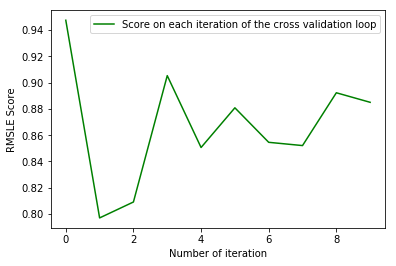

In [42]:
(ypred_lSVR_s, lSVR_s) = cross_validate_scoring(Xt, Yt, rgs_lSVR, folds)

N_cv = [i for i in range(len(lSVR_s))]
plt.plot(N_cv, lSVR_s, label='Score on each iteration of the cross validation loop', color='green')
plt.xlabel('Number of iteration') ; plt.ylabel('RMSLE Score')
plt.legend()

### SVR whithout Cross validation

In [29]:
rgs_lSVR.fit(Xt_new_, Yt)
y_SVR_ = rgs_lSVR.predict(Xvad_new_)

print(score(yvad, y_SVR_))

0.873762055561


### SVR with optimized parameters

In [30]:
from sklearn.model_selection import GridSearchCV

parameters_dict = {'C': [0.5, 1, 3, 5],
                  'epsilon' : [0.1, 0.5, 1]}

# Initialize a linear SVM object that will optimize C by grid search
rgs_gs_lSVR = GridSearchCV(svm.SVR(kernel='linear'), parameters_dict)
ypred_gs_lSVR = cross_validate(Xt, Yt, rgs_gs_lSVR, folds)

In [31]:
yvad_pred_gs_lSVR = rgs_gs_lSVR.predict(Xvad)
print(score(yvad, yvad_pred_gs_lSVR))

0.859194630351


In [32]:
rgs_gs_lSVR.best_params_

# {'C': 5, 'epsilon': 1}

{'C': 5, 'epsilon': 1}

In [43]:
score(Yt, ypred_gs_lSVR)

0.86334614899637552

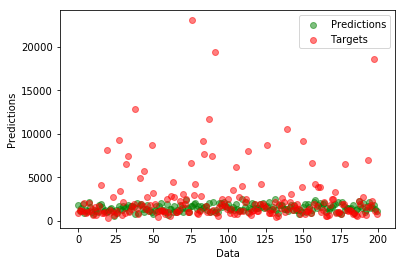

In [52]:
set_matplotlib_formats('png')

Id = [i for i in range(len(yvad[:200]))]
plt.scatter(Id, yvad_pred_gs_lSVR[:200], label='Predictions', color='green', alpha=0.5)
plt.scatter(Id, yvad[:200], label='Targets', color='red', alpha=0.5)
plt.xlabel('Data') ; plt.ylabel('Predictions')
plt.legend()

# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

rgs_GB = GradientBoostingRegressor(n_estimators=100, alpha=0.8, loss='lad', learning_rate=0.05, max_depth=4, min_samples_leaf=40)
ypred_GB = cross_validate(Xt, Yt, rgs_GB, folds)

In [34]:
yvad_pred_GB = rgs_GB.predict(Xvad)
print(score(yvad, yvad_pred_GB))

# Fuego's parameters | fex | K5 | 0.890868761554
# Fuego's parameters | fex | K10 | 0.894632896396

0.833406369438


# Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

rgs_RF = RandomForestRegressor()
ypred_tR = cross_validate(Xt, Yt, rgs_RF, folds)

In [36]:
yvad_pred_RF = rgs_RF.predict(Xvad)
print(score(yvad, yvad_pred_RF))

# | cv_fex | K10 | 1.142078502

1.00860338668


In [38]:
print(score(Yt, ypred_tR))

1.0485029782
